## Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('../data/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

In [18]:
columns = df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1. There are no NULL values.
2. Datatypes are correct for each column

- Data suffers from outliers (0 values for multiple data points and extreme values elsewhere)

In [19]:
df=df.drop_duplicates()

- Dropping duplicate values

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Conclusion** - We observe that min values in some of the columns is 0; Glucose, BloodPressure, SkinThickness, Insulin and BMI are the columns where 0 values are not possible.
- Lets perform a check these columns and get a count for the 0 values.

In [21]:
from scipy.stats import skew 

def zero_values(df, columns):
    print("Column name : Zero values : skewness")
    for column in columns:
        skewness = round(skew(df[column]), 2)
        zero_count = df[df[column]==0].shape[0]
        print(f"{column} : {zero_count} : {skewness}")
       

zero_columns = ['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']
zero_values(df, zero_columns)

Column name : Zero values : skewness
BloodPressure : 35 : -1.84
Glucose : 5 : 0.17
SkinThickness : 227 : 0.11
Insulin : 374 : 2.27
BMI : 11 : -0.43


- Glucose, SkinThickness, BMI - normal or close to normal distributions (-0.5 to 0.5) => replace with mean
- BloodPressure, Insulin - Skewed distribution => replace with median

In [22]:
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

### Visualizations

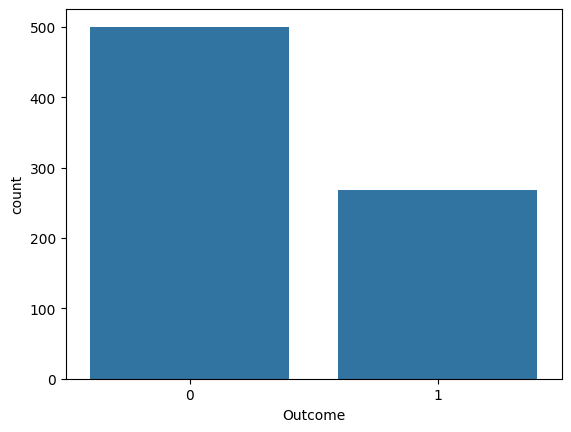

In [23]:
sns.countplot(x='Outcome', data=df)
plt.show()

Conclusion :- We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

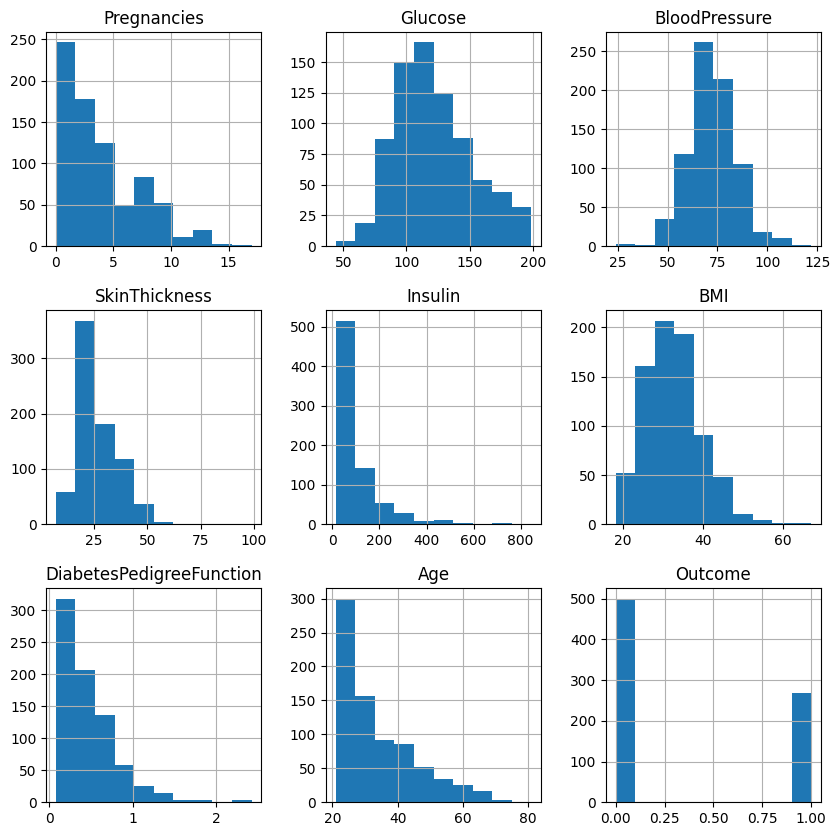

In [24]:
df.hist(bins=10,figsize=(10,10))
plt.show()

**Conclusion** :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

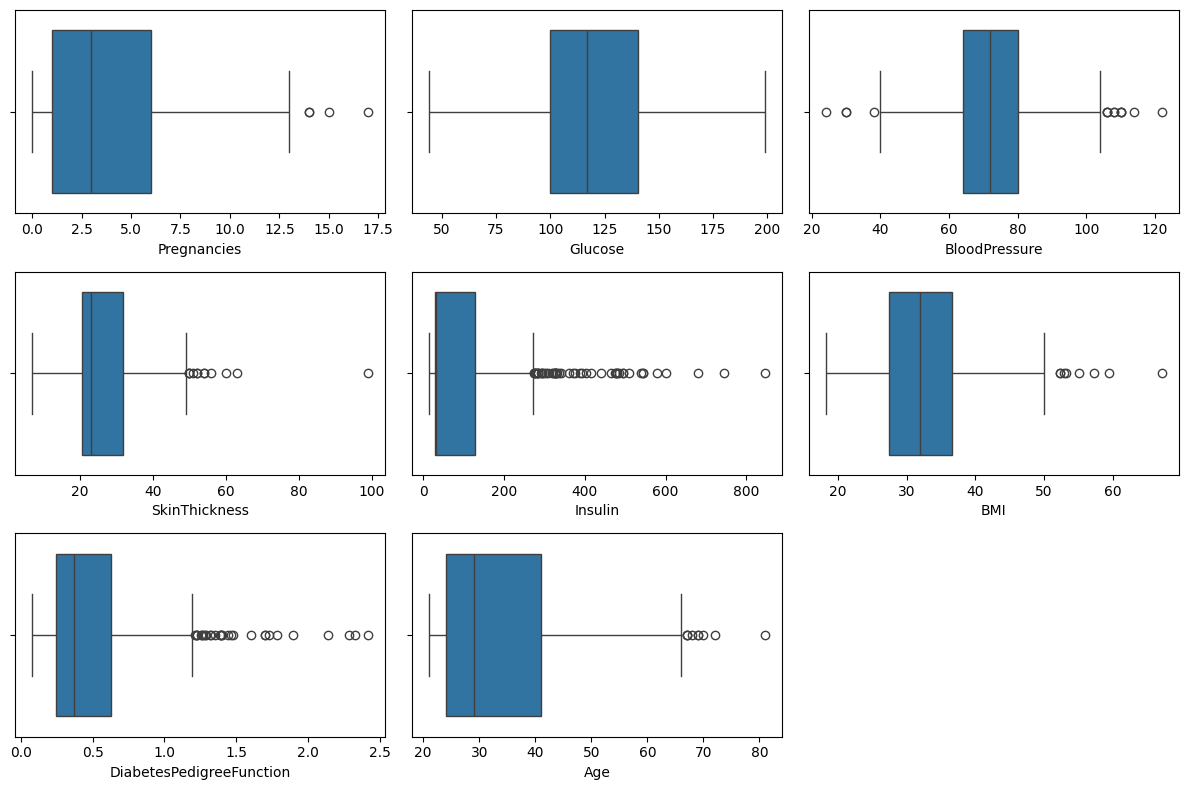

In [25]:
plt.figure(figsize=(12,8))
for i, column in enumerate(columns, start=1):
    if column != 'Outcome':
        plt.subplot(3,3,i)
        sns.boxplot(x=column, data=df)

plt.tight_layout()
plt.show()

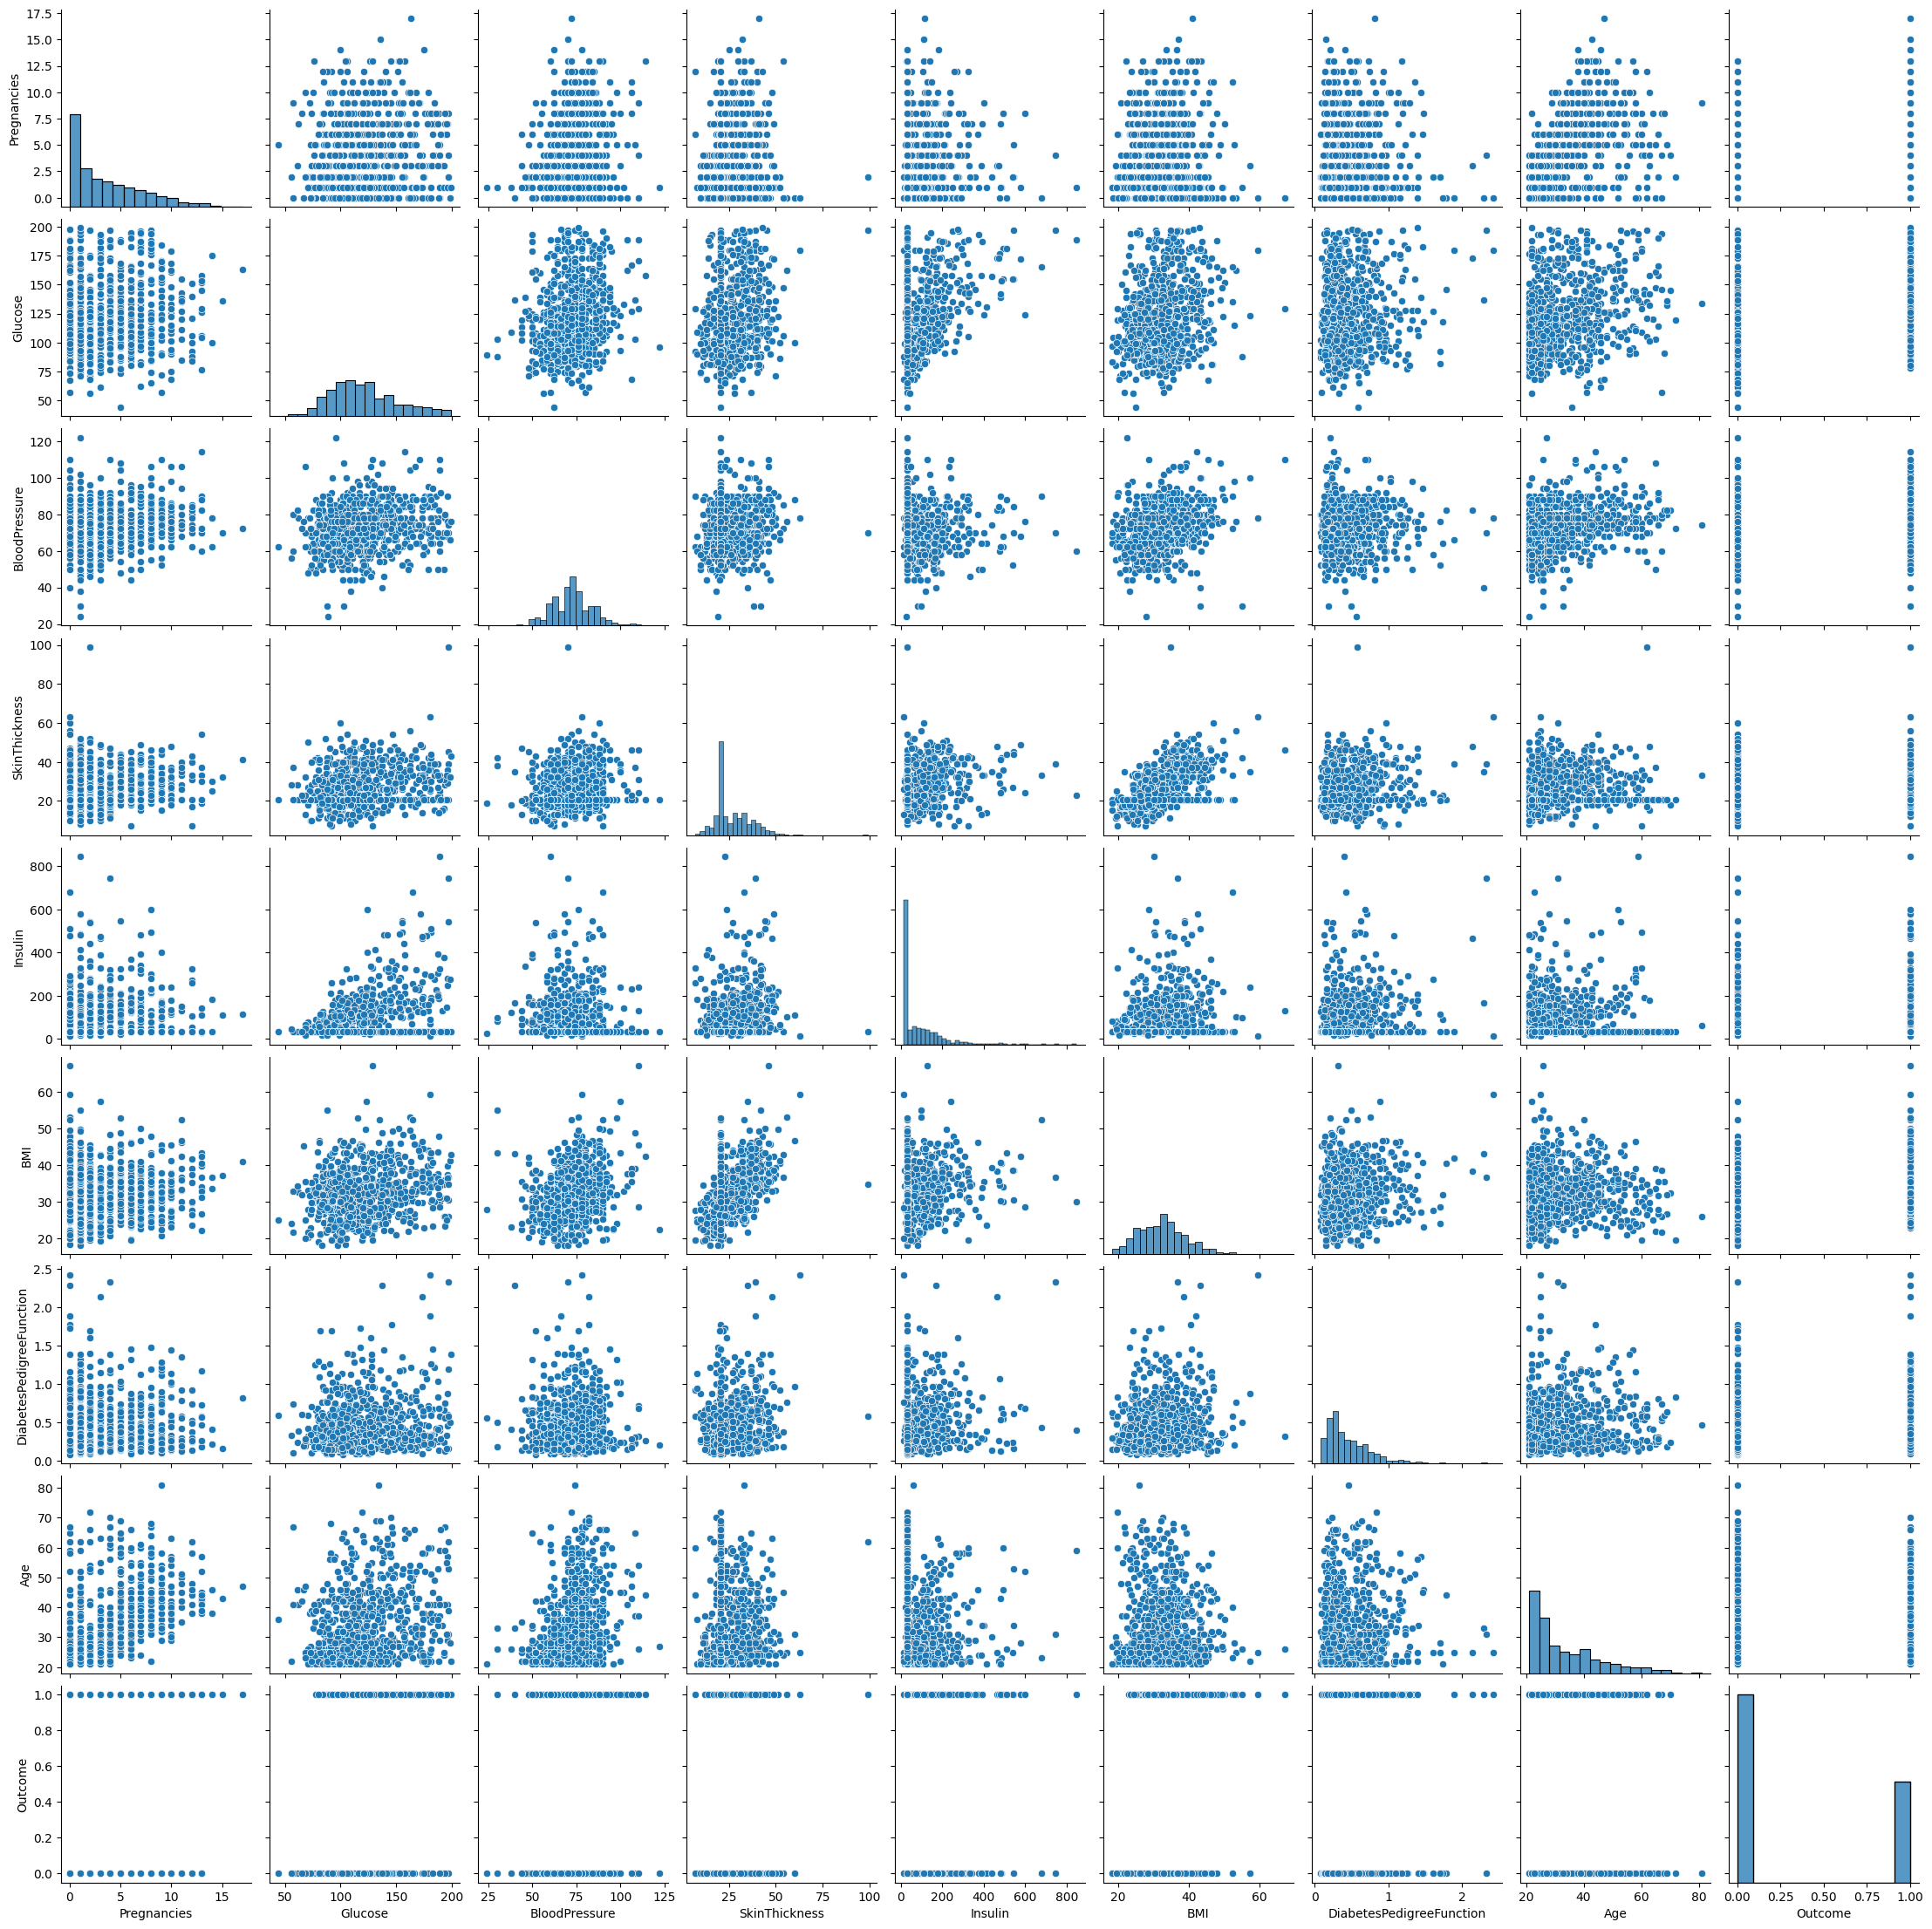

<Figure size 1600x1600 with 0 Axes>

In [26]:
sns.pairplot(data=df)
plt.figure(figsize=(16,16))
plt.show()

<Axes: >

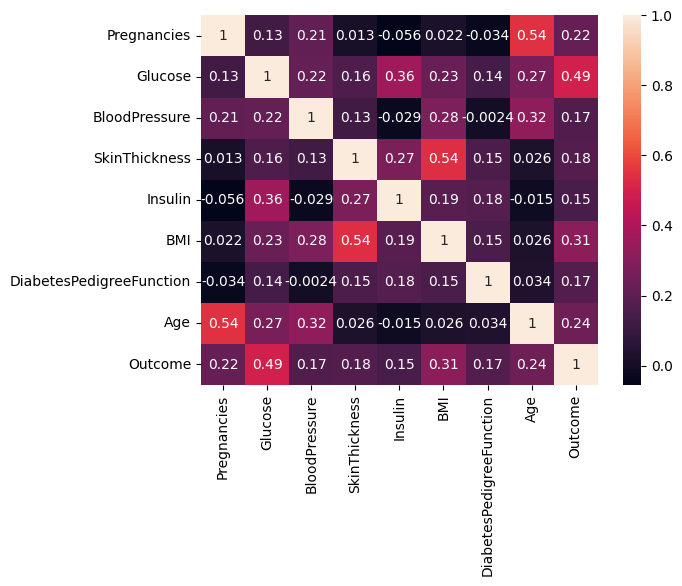

In [27]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)

**Conclusion** :- We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them. 
- ***EDIT - Dropping the columns reduces the overall performance of all models, thus I will refrain from doing so.***

In [28]:
# df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')
df_selected = df

In [29]:
from sklearn.preprocessing import QuantileTransformer

x = df_selected
quantile = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
x_transformed = quantile.fit_transform(x)
df_new = pd.DataFrame(x_transformed, columns=df_selected.columns)
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747475,0.808824,0.489899,0.803030,0.257576,0.594595,0.751386,0.888889,1.0
1,0.232323,0.090909,0.287879,0.641414,0.257576,0.212121,0.476243,0.555556,0.0
2,0.863636,0.956229,0.232323,0.313131,0.257576,0.075783,0.784680,0.580808,1.0
3,0.232323,0.121509,0.287879,0.505051,0.665224,0.285354,0.104145,0.000000,0.0
4,0.000000,0.717172,0.008081,0.803030,0.832884,0.926186,0.998153,0.606061,1.0


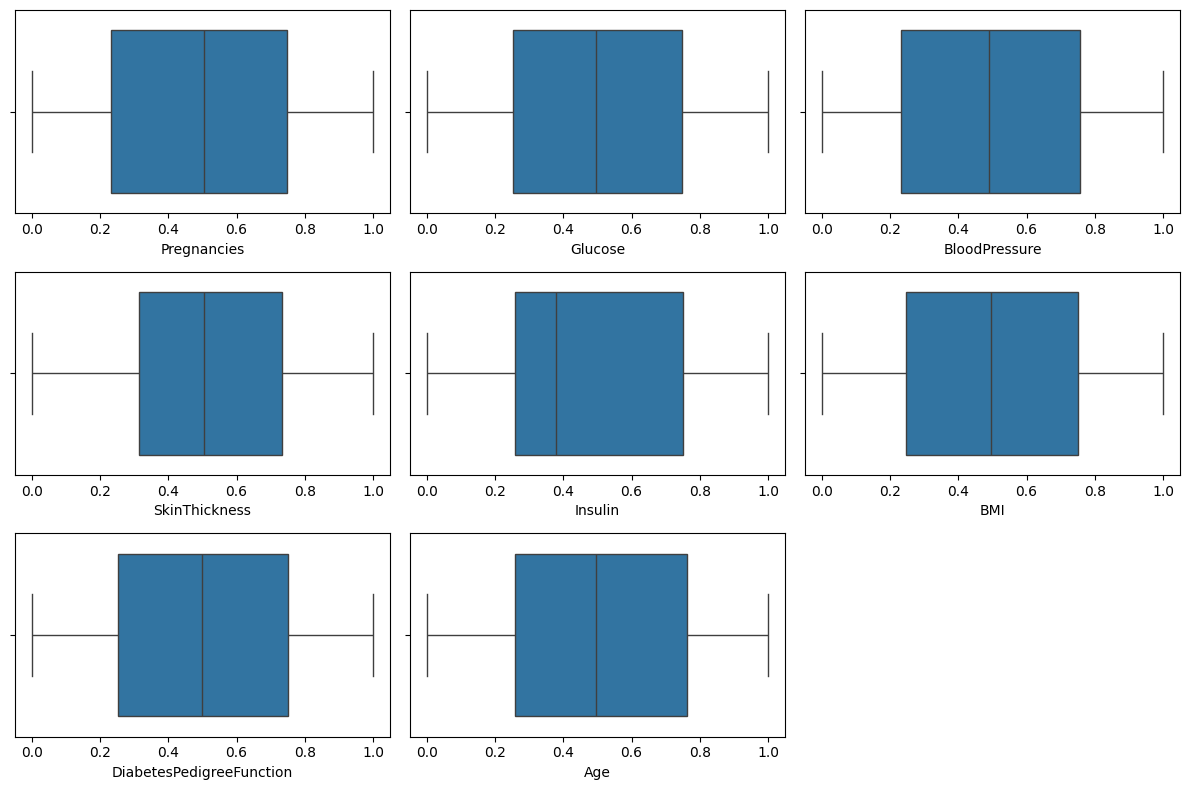

In [30]:
plt.figure(figsize=(12,8))
for i, column in enumerate(df_new.columns, start=1):
    if column != 'Outcome':
        plt.subplot(3,3,i)
        sns.boxplot(x=column, data=df_new)

plt.tight_layout()
plt.show()

## Model

In [31]:
target = "Outcome"
y = df_new[target]
x = df_new.drop(target, axis=1)

In [32]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.747475,0.808824,0.489899,0.803030,0.257576,0.594595,0.751386,0.888889
1,0.232323,0.090909,0.287879,0.641414,0.257576,0.212121,0.476243,0.555556
2,0.863636,0.956229,0.232323,0.313131,0.257576,0.075783,0.784680,0.580808
3,0.232323,0.121509,0.287879,0.505051,0.665224,0.285354,0.104145,0.000000
4,0.000000,0.717172,0.008081,0.803030,0.832884,0.926186,0.998153,0.606061


In [33]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
prediction_lr = lr_model.predict(X_test)
f1_score(y_test, prediction_lr)

0.5806451612903226

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
prediction_rf = rf_model.predict(X_test)
f1_score(y_test, prediction_rf)

0.608695652173913

In [37]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)
predictions_xgboost = xgboost_model.predict(X_test)
f1_score(y_test, predictions_xgboost)

0.577319587628866

Conclusion :- Random Forest gives the best performance (F1 score = 0.69).
Now, we will perform hyperparameter tuning to optimize the model further. 

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

f1_scorer = make_scorer(f1_score)

grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid,
                           scoring=f1_scorer,
                           cv=5)
grid_search.fit(X_train, y_train)
optimized_params = grid_search.best_params_

optimized_model = RandomForestClassifier(**optimized_params)
optimized_model.fit(X_train, y_train)
prediction_rf_optimized = optimized_model.predict(X_test)
f1_score(y_test, prediction_rf_optimized)

0.6021505376344086

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction_rf_optimized))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       102
         1.0       0.68      0.54      0.60        52

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



## Exporting the Model

In [46]:
import os
import pickle


data = {'model':optimized_model}
with open('../model/random_forest_optimizer.pk1', 'wb') as file:
    pickle.dump(data, file)

---